Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package. 


**Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [12]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar100
import tensorflow.keras.applications as apps
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy
import tensorflow as tf
# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
# Learning rate (0.0001, 0.1, 0.5), dropout rate (0, 0.4, 0.8), architecture (alexNet, vggNet, resnet), optimisers (sgd, adam, rmsprop)
learningRates = [0.0001, 0.1, 0.5]
dropoutRates = [0, 0.4, 0.8]
print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [13]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 40 # use 20 for best initial results
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [14]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [15]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

In [21]:
vgg = apps.VGG19(classes=N_CLASSES, weights=None, include_top=False, pooling="max", input_shape=input_X_train[0].shape)
flatten = Flatten()(vgg.layers[-1].output)
dense1 = Dense(4096, activation="relu")(flatten)
dense2 = Dense(4096, activation="relu")(dense1)
predictions = Dense(N_CLASSES, activation="softmax")(dense2)
model = tf.keras.Model(inputs=vgg.inputs, outputs=[flatten, dense1, dense2, predictions])
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [13]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary. 


In [14]:
# compile the model
model.compile(loss=categorical_crossentropy, optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [15]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20


2024-04-19 17:43:26.539374: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-19 17:43:26.580818: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-19 17:43:26.679735: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-19 17:43:26.896639: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


625/625 [==============================] - 4s 5ms/step - loss: 4.5560 - accuracy: 0.0217 - val_loss: 4.4393 - val_accuracy: 0.0445
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 4.3562 - accuracy: 0.0446 - val_loss: 4.1739 - val_accuracy: 0.0729
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 4.1802 - accuracy: 0.0657 - val_loss: 4.0159 - val_accuracy: 0.1078
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 4.0455 - accuracy: 0.0850 - val_loss: 3.8854 - val_accuracy: 0.1226
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 3.9482 - accuracy: 0.0994 - val_loss: 3.7891 - val_accuracy: 0.1392
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 3.8646 - accuracy: 0.1138 - val_loss: 3.7232 - val_accuracy: 0.1526
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 3.7981 - accuracy: 0.1267 - val_loss: 3.6596 - val_accuracy: 0.1620
Epoch 8/20
625/62

**Saving of the model and of the trained weights**

This saves the model definition and the weights, after training.



In [16]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


157/157 [==============================] - 1s 4ms/step - loss: 3.1226 - accuracy: 0.2595

Test score/loss: 3.122638463973999
Test accuracy: 0.25949999690055847
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


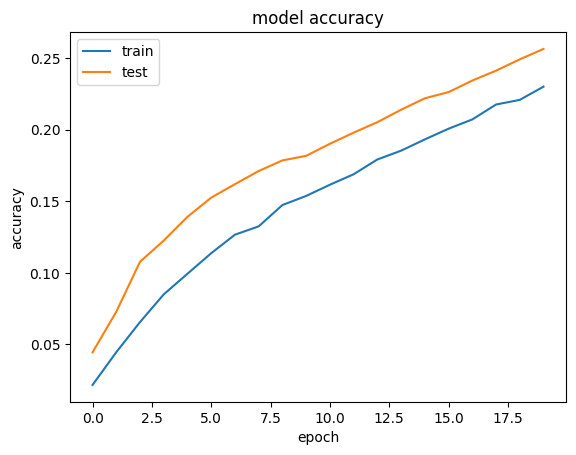

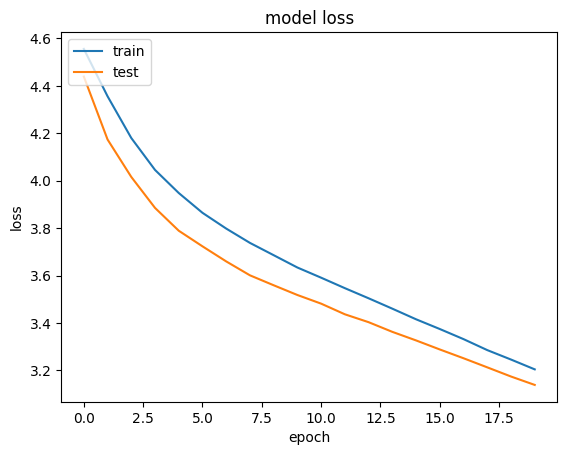

In [17]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


A deeper CNN
-------------

To improve the performance of the network on the CIFAR-10 dataset, it is possible to use a deeper CNN, with a chain of multiple convolution and pooling layers.
The following network will be used:

conv+conv+maxpool+dropout+conv+conv+maxpool

The final classification layers will use the standard:

dense+dropout+dense

All the layers will use the reLu function, except the final one with the Softmax function necessary for the categorical classification 


In [18]:
# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40 # 40 bigger network will benefit from extra training epochs

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                      

**Training of the deeper CNN**

Let's train (fit) this new model.



In [19]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/40


2024-04-19 17:44:26.603647: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 4s 6ms/step - loss: 4.6054 - accuracy: 0.0114 - val_loss: 4.6027 - val_accuracy: 0.0268
Epoch 2/40
625/625 [==============================] - 4s 6ms/step - loss: 4.6013 - accuracy: 0.0141 - val_loss: 4.5960 - val_accuracy: 0.0248
Epoch 3/40
625/625 [==============================] - 4s 6ms/step - loss: 4.5808 - accuracy: 0.0167 - val_loss: 4.5285 - val_accuracy: 0.0234
Epoch 4/40
625/625 [==============================] - 3s 6ms/step - loss: 4.5069 - accuracy: 0.0206 - val_loss: 4.4343 - val_accuracy: 0.0308
Epoch 5/40
625/625 [==============================] - 4s 6ms/step - loss: 4.4391 - accuracy: 0.0251 - val_loss: 4.3680 - val_accuracy: 0.0332
Epoch 6/40
625/625 [==============================] - 4s 6ms/step - loss: 4.3853 - accuracy: 0.0292 - val_loss: 4.3243 - val_accuracy: 0.0415
Epoch 7/40
625/625 [==============================] - 4s 6ms/step - loss: 4.3432 - accuracy: 0.0338 - val_loss: 4.2788 - val_accuracy: 0.0454
Epoch 8/40
625/62

**Analysis of the Deeper CNN results**

This generates the test scores and plots for the new, deeper DNN.


157/157 [==============================] - 1s 4ms/step - loss: 3.2700 - accuracy: 0.2172

Test score/loss: 3.26998233795166
Test accuracy: 0.21719999611377716
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


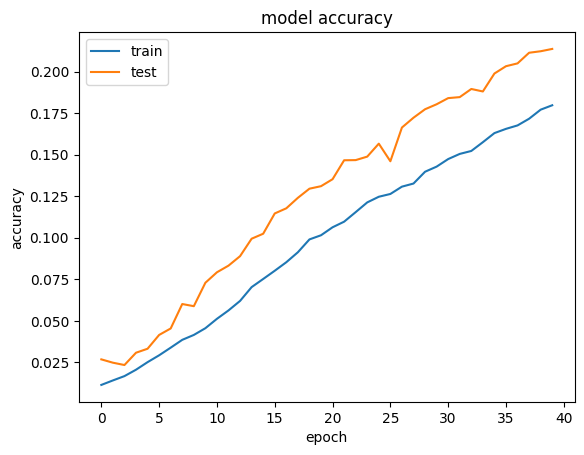

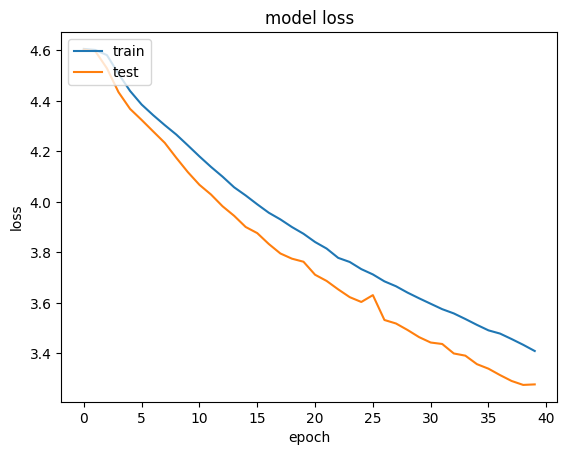

In [20]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [22]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/40


/tmp/ipykernel_51154/3979763547.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)
2024-04-19 17:46:47.021924: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


781/781 [==============================] - 12s 16ms/step - loss: 3.7020 - accuracy: 0.1301
Epoch 2/40
781/781 [==============================] - 11s 14ms/step - loss: 3.6823 - accuracy: 0.1319
Epoch 3/40
781/781 [==============================] - 12s 15ms/step - loss: 3.6603 - accuracy: 0.1353
Epoch 4/40
781/781 [==============================] - 11s 15ms/step - loss: 3.6507 - accuracy: 0.1361
Epoch 5/40
781/781 [==============================] - 12s 15ms/step - loss: 3.6322 - accuracy: 0.1403
Epoch 6/40
781/781 [==============================] - 11s 14ms/step - loss: 3.6131 - accuracy: 0.1440
Epoch 7/40
781/781 [==============================] - 12s 15ms/step - loss: 3.6044 - accuracy: 0.1470
Epoch 8/40
781/781 [==============================] - 11s 14ms/step - loss: 3.5943 - accuracy: 0.1481
Epoch 9/40
781/781 [==============================] - 11s 14ms/step - loss: 3.5862 - accuracy: 0.1476
Epoch 10/40
781/781 [==============================] - 12s 15ms/step - loss: 3.5716 - accurac

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

157/157 [==============================] - 1s 4ms/step - loss: 2.9621 - accuracy: 0.2685

Test score/loss: 2.9621384143829346
Test accuracy: 0.2685000002384186
dict_keys(['loss', 'accuracy'])


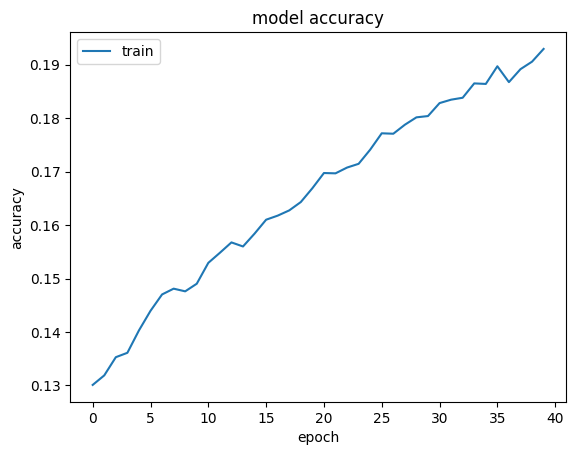

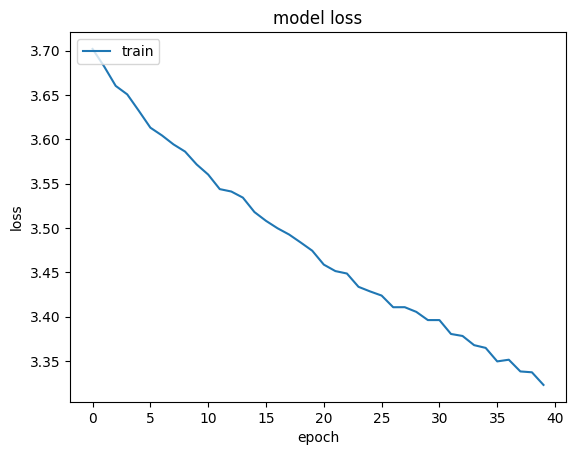

In [23]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [24]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.